<a href="https://colab.research.google.com/github/akshats13/House-Prediction-in-Pytorch/blob/main/housepriceprediction_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("houseprice.csv",usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [10]:
df.shape

(1201, 10)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [13]:
for i in df.columns:
  print('Column name {} and unique values are {}'.format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [14]:
import datetime
datetime.datetime.now().year

2024

In [15]:
df['Total Years']= datetime.datetime.now().year - df['YearBuilt']
df.drop("YearBuilt",axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

## Creating categorical features


In [24]:
cat_features = ["MSSubClass","MSZoning","Street","LotShape"]
output_featrure = "SalePrice"

In [31]:
#Label Encoding of Categorical Features
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}

for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [32]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


## Converting these categorical features to Tensors

In [35]:
cat_features =  np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
import torch
cat_features = torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

## Creating continuous Variables

In [40]:
cont_features = []
for i in df.columns:
  if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
    pass
  else:
    cont_features.append(i)

In [38]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [41]:
## Converting these continuous variable into a tensor

cont_values = np.stack([df[i].values for i in cont_features],1)
cont_values = torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [42]:
cont_values.dtype

torch.float32

## Creating Dependant features


In [43]:
y = torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


## Creting embedding dimensions on the categorical features

In [46]:
cat_dimensions = [len(df[col].unique()) for col in ['MSSubClass','MSZoning','Street','LotShape']]
cat_dimensions

[15, 5, 2, 4]

In [48]:
embedding_dimensions = [(x, min(50, (x+1) // 2)) for x in cat_dimensions]
embedding_dimensions

[(15, 8), (5, 3), (2, 1), (4, 2)]

## Creating the embedding layers


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embedding_representation  = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dimensions])
embedding_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [50]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [51]:
pd.set_option('display.max_rows',500)
embedding_values = []
for i,e in enumerate(embedding_representation):
  embedding_values.append(e(cat_features[:,i]))
embedding_values

[tensor([[-0.5496,  0.3361, -0.4083,  ...,  0.2769,  0.0253, -1.3392],
         [-0.1704, -1.0872, -1.1687,  ..., -0.7576, -0.6558,  0.4646],
         [-0.5496,  0.3361, -0.4083,  ...,  0.2769,  0.0253, -1.3392],
         ...,
         [-0.3735, -0.0629,  0.4609,  ...,  0.1551,  1.1776,  0.8093],
         [-0.1704, -1.0872, -1.1687,  ..., -0.7576, -0.6558,  0.4646],
         [-0.1704, -1.0872, -1.1687,  ..., -0.7576, -0.6558,  0.4646]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.3580,  1.8547, -0.5400],
         [ 0.3580,  1.8547, -0.5400],
         [ 0.3580,  1.8547, -0.5400],
         ...,
         [ 0.3580,  1.8547, -0.5400],
         [ 0.3580,  1.8547, -0.5400],
         [ 0.3580,  1.8547, -0.5400]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.6046],
         [1.6046],
         [1.6046],
         ...,
         [1.6046],
         [1.6046],
         [1.6046]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7334,  1.8400],
         [-0.7334,  1.8400],
         [ 0.5046, -0.9751],

In [52]:
z = torch.cat(embedding_values,1)
z

tensor([[-0.5496,  0.3361, -0.4083,  ...,  1.6046, -0.7334,  1.8400],
        [-0.1704, -1.0872, -1.1687,  ...,  1.6046, -0.7334,  1.8400],
        [-0.5496,  0.3361, -0.4083,  ...,  1.6046,  0.5046, -0.9751],
        ...,
        [-0.3735, -0.0629,  0.4609,  ...,  1.6046, -0.7334,  1.8400],
        [-0.1704, -1.0872, -1.1687,  ...,  1.6046, -0.7334,  1.8400],
        [-0.1704, -1.0872, -1.1687,  ...,  1.6046, -0.7334,  1.8400]],
       grad_fn=<CatBackward0>)

In [53]:
dropout = nn.Dropout(0.4)
final_embeddings = dropout(z)
final_embeddings

tensor([[-0.0000,  0.0000, -0.0000,  ...,  2.6743, -1.2223,  3.0666],
        [-0.2841, -0.0000, -0.0000,  ...,  2.6743, -1.2223,  3.0666],
        [-0.0000,  0.0000, -0.6805,  ...,  2.6743,  0.0000, -1.6252],
        ...,
        [-0.6225, -0.0000,  0.0000,  ...,  2.6743, -0.0000,  0.0000],
        [-0.0000, -1.8120, -0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [-0.0000, -0.0000, -0.0000,  ...,  2.6743, -1.2223,  0.0000]],
       grad_fn=<MulBackward0>)

## Creating the Feed Forward Neural Network

In [54]:
class FeedForwardNN(nn.Module):

  def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
    super().__init__()
    self.emdeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)

    layerlist=[]
    n_emb = sum((out for inp,out in embedding_dim))
    n_in = n_emb + n_cont
    for i in layers:
      layerlist.append(nn.Linear(n_in,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i
    layerlist.append(nn.Linear(layers[-1],out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self,x_cat,x_cont):
    embeddings = []
    for i,e in enumerate(self.emdeds):
      embeddings.append(e(x_cat[:,i]))
    x = torch.cat(embeddings,1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x,x_cont],1)
    x = self.layers(x)
    return x

In [55]:
len(cont_features)

5

In [56]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dimensions, len(cont_features),1,[100,50],p=0.4)

In [57]:
model

FeedForwardNN(
  (emdeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Defining the Loss and the Optimizer

In [58]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [59]:
df.shape

(1201, 10)

In [63]:
batch_size = 1200
test_size = int(batch_size*0.15)
#split for categorical features
train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]
#split for continuous features
train_continuous = cont_values[:batch_size-test_size]
test_continuous = cont_values[batch_size-test_size:batch_size]
train_y = y[:batch_size-test_size]
test_y = y[batch_size-test_size:batch_size]


In [62]:
len(train_categorical), len(test_categorical),len(train_continuous),len(test_continuous),len(train_y),len(test_y)

(1020, 180, 1020, 180, 1020, 180)

In [64]:
epochs = 5000
final_loss = []
for i in range(epochs):
  i=i+1
  y_pred = model(train_categorical,train_continuous)
  loss = torch.sqrt(loss_function(y_pred,train_y))
  final_loss.append(loss)
  if i%100 == 1:
    print("Epoch number {} and the loss {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number 1 and the loss 200496.75
Epoch number 101 and the loss 200355.234375
Epoch number 201 and the loss 199882.578125
Epoch number 301 and the loss 199026.359375
Epoch number 401 and the loss 197880.46875
Epoch number 501 and the loss 196433.1875
Epoch number 601 and the loss 194524.546875
Epoch number 701 and the loss 192295.09375
Epoch number 801 and the loss 189862.234375
Epoch number 901 and the loss 187453.25
Epoch number 1001 and the loss 184305.921875
Epoch number 1101 and the loss 181314.421875
Epoch number 1201 and the loss 178094.046875
Epoch number 1301 and the loss 174203.890625
Epoch number 1401 and the loss 170483.765625
Epoch number 1501 and the loss 166359.65625
Epoch number 1601 and the loss 162409.46875
Epoch number 1701 and the loss 157589.25
Epoch number 1801 and the loss 153181.234375
Epoch number 1901 and the loss 148561.421875
Epoch number 2001 and the loss 144118.578125
Epoch number 2101 and the loss 139330.375
Epoch number 2201 and the loss 134155.21875

Text(0.5, 0, 'Epochs')

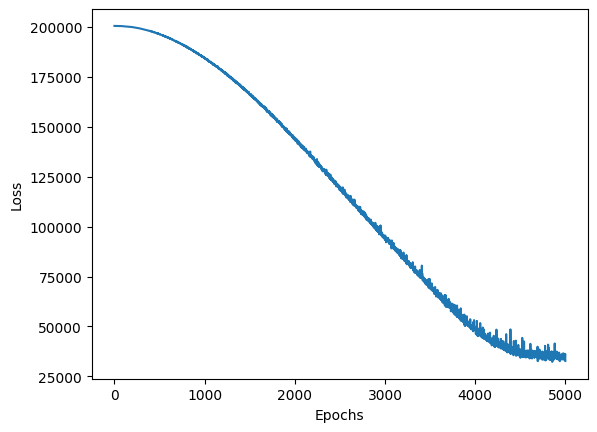

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
final_loss_array = np.array([loss.detach().numpy() for loss in final_loss])
plt.plot(range(epochs),final_loss_array)
plt.ylabel("Loss")
plt.xlabel("Epochs")